In [15]:
import sympy as sp
import numpy as np
import cmath
from matplotlib import pyplot as plt
from matplotlib.widgets import Slider
from jupyterthemes import jtplot
sp.init_printing()
jtplot.style(theme='gruvboxd')
%matplotlib notebook

In [16]:
def L(y, s, t):
    return sp.laplace_transform(y, t, s, noconds=True)
def L_inv(y, s, t):
    return sp.inverse_laplace_transform(y, s, t)

## First order system
$A\frac{dh'}{dt}=F_{in}^{'}- kh^{'}$

In [17]:
sp.var("τ, K, t, h, ζ", positive=True, real=True)
sp.var("s")
G_s = K/(τ*s+1)
G_s

In [18]:
# Step response
F_in = sp.Heaviside(t)
F_in_s = L(F_in, s, t)
F_in_s

In [19]:
H_s = G_s*F_in_s
h_t = L_inv(H_s, s, t)
h_t

<IPython.core.display.Javascript object>


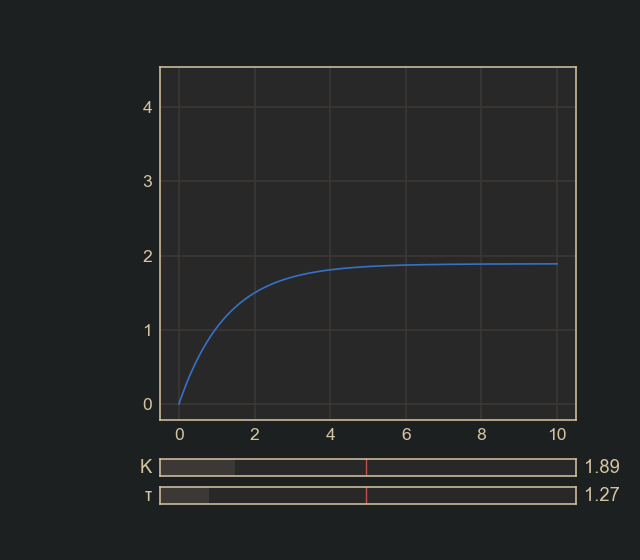

In [20]:
τ_i = 5
K_i = 5

t_span = np.linspace(0, 10, 2001)
h_t = sp.lambdify((K, τ, t), h_t, 'numpy')
y = h_t(K_i, τ_i, t_span)

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)

y_plot, = plt.plot(t_span, y)
ax_τ = plt.axes([0.25, 0.1, 0.65, 0.03])
ax_K = plt.axes([0.25, 0.15, 0.65, 0.03])

slider_τ = Slider(ax_τ, 'τ', 0.1, 10, valinit=5)
slider_K = Slider(ax_K, 'K', 0.1, 10, valinit=5)

def update(val):
    τ_val = slider_τ.val
    K_val = slider_K.val
    
    y = h_t(K_val, τ_val, t_span)
    y_plot.set_ydata(y)
    fig.canvas.draw_idle() 

slider_τ.on_changed(update)
slider_K.on_changed(update)

## Second order system

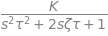

In [21]:
G2_s = K/(τ**2*s**2 + 2*ζ*τ*s + 1)
G2_s

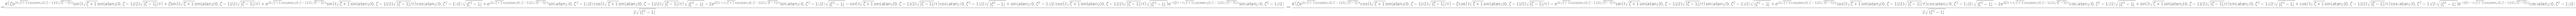

In [8]:
# Step response
H2_s = G2_s.apart(s)*F_in_s
h2_t = sp.re(L_inv(H2_s, s, t).simplify())
h2_t

In [9]:
# Imaginary part of h2_t tends to zero, but needs to be manually cut out since approximation techniques leaves imaginary remainders
# h2_t_rem = sp.im(L_inv(H2_s, s, t).simplify())
# t_span = np.linspace(0, 50, 2001)
# h2_t_rem = sp.lambdify((K, τ, ζ, t), h2_t_rem, 'numpy')
# y = h2_t_rem(5, 5, 0, t_span)
# plt.figure()
# plt.plot(t_span, y)

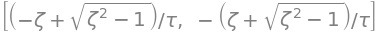

In [10]:
# Poles
G2_s_poles = sp.solve(sp.denom(G2_s), s)
G2_s_poles
poles_fn = sp.lambdify((τ, ζ), G2_s_poles, 'numpy')
display(G2_s_poles)
poles = poles_fn(1+0j, 0.2+0j) 

# to get numpy to output a complex number, have to parse in a complex number

<IPython.core.display.Javascript object>


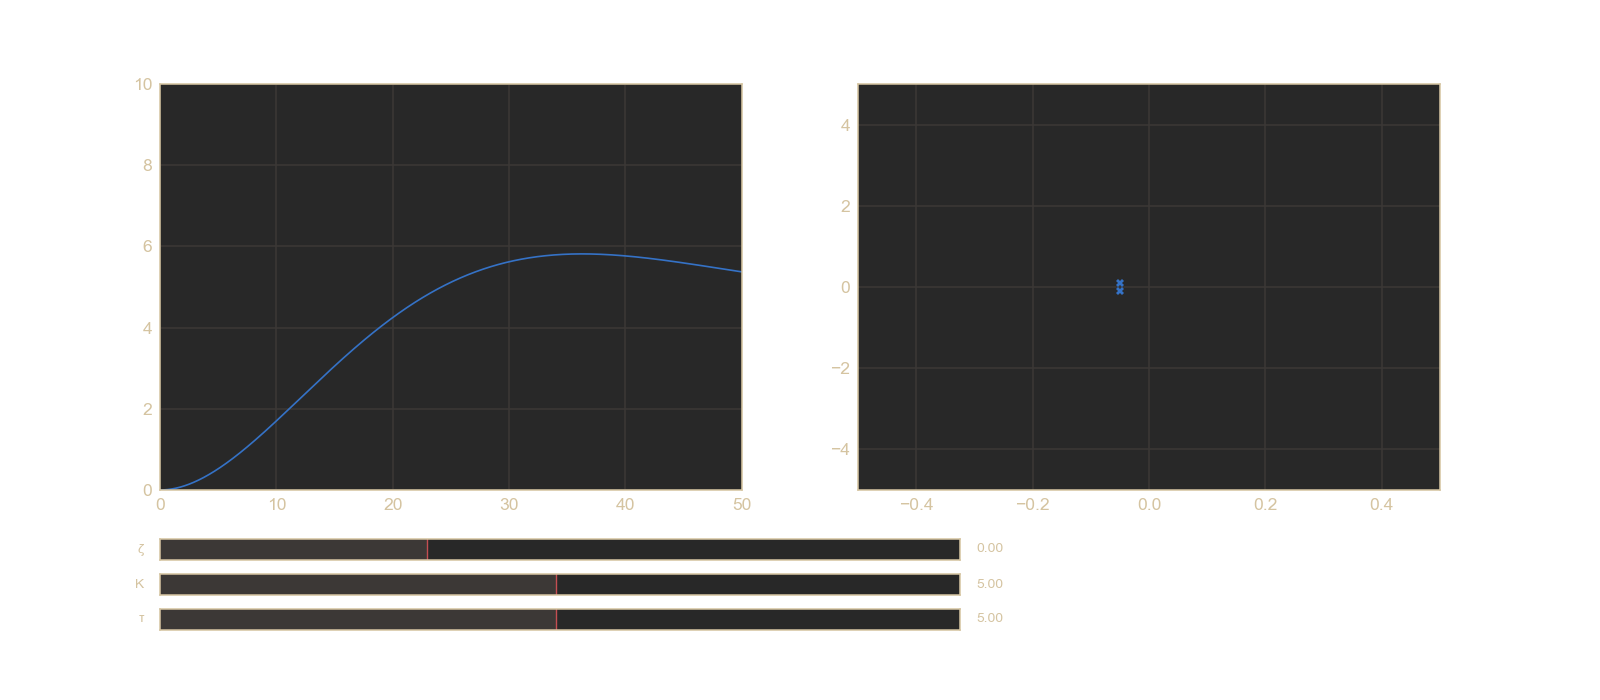

In [11]:
τ_i = 10
K_i = 5
ζ_i = 0.5
t_max = 50

# initial
t_span = np.linspace(0, t_max, 2001)
h2_t = sp.lambdify((K, τ, ζ, t), h2_t, 'numpy')
y = h2_t(K_i, τ_i, ζ_i, t_span)

poles_fn = sp.lambdify((τ, ζ), G2_s_poles, 'numpy')
poles = poles_fn(τ_i+0j, ζ_i+0j)
poles_x = [pole.real for pole in poles]
poles_y = [pole.imag for pole in poles]

# plot initialisation
fig, ax = plt.subplots(1, 2, figsize=(16, 7))
plt.subplots_adjust(left=0.1, bottom=0.3)

# build initial plots and and sliders
y_plot, = ax[0].plot(t_span, y)
poles_plot, = ax[1].plot(poles_x, poles_y, 'X')

ax[0].set_xlim(0, t_max)
ax[0].set_ylim(0, 10)
ax[1].set_xlim(-0.5, 0.5)
ax[1].set_ylim(-5, 5)

ax_τ = plt.axes([0.1, 0.1, 0.5, 0.03])
ax_K = plt.axes([0.1, 0.15, 0.5, 0.03])
ax_ζ = plt.axes([0.1, 0.2, 0.5, 0.03])

slider_τ = Slider(ax_τ, 'τ', 0.1, 10, valinit=5)
slider_K = Slider(ax_K, 'K', 0.1, 10, valinit=5)
slider_ζ = Slider(ax_ζ, 'ζ', -1, 2, valinit=0)

# update function
def update(val):
    τ_val = slider_τ.val
    K_val = slider_K.val
    ζ_val = slider_ζ.val
    
    y = h2_t(K_val, τ_val, ζ_val, t_span)
    y_plot.set_ydata(y)
    
    poles = poles_fn(τ_val+0j, ζ_val+0j)
    poles_x = [pole.real for pole in poles]
    poles_y = [pole.imag for pole in poles]
    poles_plot.set_data(poles_x, poles_y)
    
    fig.canvas.draw_idle() 

# on change event
slider_τ.on_changed(update)
slider_K.on_changed(update)
slider_ζ.on_changed(update)